<a href="https://colab.research.google.com/github/shivani123-code/AMAZONE-CLONE/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
print("hello")

hello


In [ ]:
pip install tensorflow==2.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 421.8 MB 23 kB/s 
     |████████████████████████████████| 448 kB 53.3 MB/s 
     |████████████████████████████████| 3.8 MB 55.7 MB/s 
     |████████████████████████████████| 26.1 MB 1.4 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=bd712f4eefd9d2fb88a0ccf188eea34d60f3c97c9fe1e83af06bfc577a88a563
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting 

In [10]:
train_data_path = "/content/drive/MyDrive/archive (3)/dataset"

In [11]:
pip install keras==2.3.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 377 kB 14.0 MB/s 
     |████████████████████████████████| 50 kB 7.6 MB/s 
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires keras<2.10.0,>=2.9.0rc0, but you have keras 2.3.1 which is incompatible.


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score,f1_score, classification_report
import cv2
import seaborn as sns 

In [13]:
import tensorflow as tf

train_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,                                                                                                                   
                                                           rotation_range=0.2,
                                                           width_shift_range=0.2,
                                                           height_shift_range=0.2,
                                                           zoom_range = 0.2, 
                                                           horizontal_flip=True,
                                                           validation_split = 0.02
                                                            )

test_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1/255.,
                                                           validation_split = 0.2
                                                           )


In [14]:
train_data = train_gen.flow_from_directory(train_data_path ,
                                           target_size = (224,224),
                                           class_mode = "categorical",
                                           seed = 42,
                                           subset = "training"
                                           )

test_data = test_gen.flow_from_directory(train_data_path ,
                                         target_size = (224,224),
                                         class_mode = "categorical",
                                         seed = 42,
                                         subset = "validation"
                                         )

Found 1522 images belonging to 3 classes.
Found 310 images belonging to 3 classes.


In [15]:
labels = list(train_data.class_indices.keys())

labels

['incorrect_mask', 'with_mask', 'without_mask']

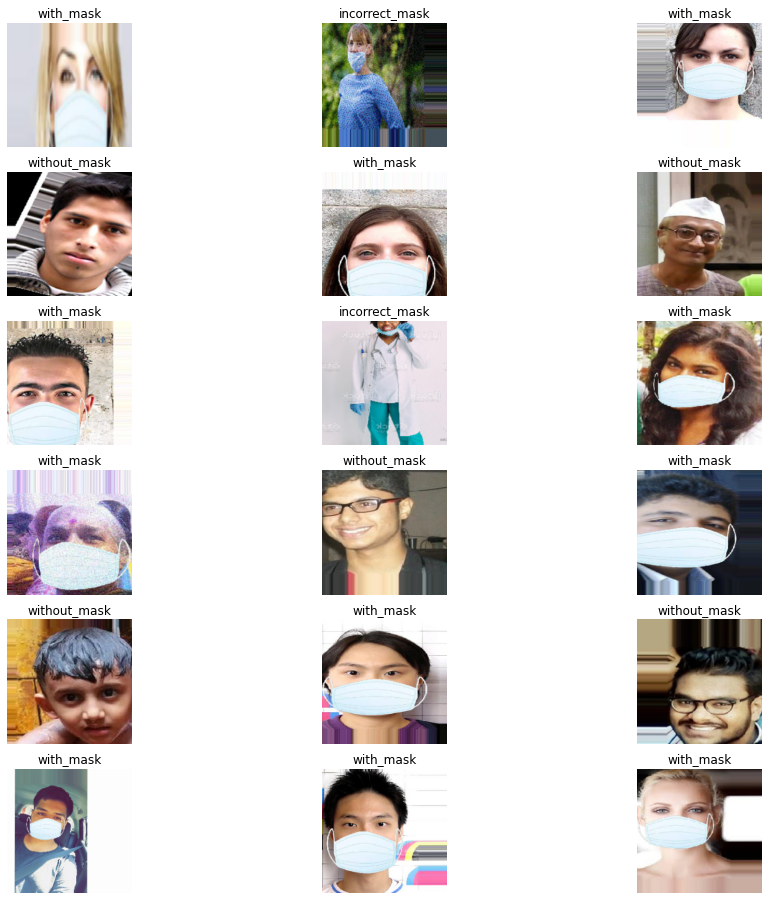

In [8]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize = (16,16))

for i in range(18):
  image,label = train_data.next()

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(labels[tf.argmax(label[i])])
  plt.axis("off")


In [16]:
import tensorflow as tf
from tensorflow.keras import layers
model  = tf.keras.Sequential([
                              
                              layers.Conv2D(filters= 64, kernel_size= 2, activation="relu", input_shape=(224,224,3)),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Conv2D(filters = 64, kernel_size= 2, activation= "relu"),
                              layers.MaxPooling2D(pool_size= 2),

                              layers.Flatten(),

                              layers.Dense(128, activation="relu"),
                              layers.Dropout(0.5),

                              layers.Dense(3, activation= "softmax")
])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 64)      832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 110, 110, 64)      16448     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 55, 55, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 54, 54, 64)        16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 27, 27, 64)       0

In [18]:
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ["accuracy"])

In [19]:
model.fit(train_data,
          epochs = 5,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/5


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
48/48 [==============================] - ETA: 0s - loss: 1.0633 - accuracy: 0.4849

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
48/48 [==============================] - 273s 6s/step - loss: 1.0633 - accuracy: 0.4849 - val_loss: 0.7881 - val_accuracy: 0.7129
Epoch 2/5
48/48 [==============================] - 27s 553ms/step - loss: 0.6976 - accuracy: 0.7398 - val_loss: 0.3702 - val_accuracy: 0.8581
Epoch 3/5
48/48 [==============================] - 27s 556ms/step - loss: 0.5364 - accuracy: 0.8127 - val_loss: 0.3420 - val_accuracy: 0.8710
Epoch 4/5
48/48 [==============================] - 27s 558ms/step - loss: 0.4661 - accuracy: 0.8384 - val_loss: 0.2846 - val_accuracy: 0.9226
Epoch 5/5
48/48 [==============================] - 27s 557ms/step - loss: 0.4163 - accuracy: 0.8620 -

In [20]:
model.fit(train_data,
          epochs = 10,
          steps_per_epoch = len(train_data),
          validation_data = test_data,
          validation_steps = len(test_data)
          )

Epoch 1/10
48/48 [==============================] - 27s 561ms/step - loss: 0.3661 - accuracy: 0.8739 - val_loss: 0.1602 - val_accuracy: 0.9419
Epoch 2/10
48/48 [==============================] - 26s 549ms/step - loss: 0.3250 - accuracy: 0.8903 - val_loss: 0.1538 - val_accuracy: 0.9484
Epoch 3/10
48/48 [==============================] - 27s 552ms/step - loss: 0.2839 - accuracy: 0.9060 - val_loss: 0.1461 - val_accuracy: 0.9645
Epoch 4/10
48/48 [==============================] - 27s 552ms/step - loss: 0.2935 - accuracy: 0.8995 - val_loss: 0.1434 - val_accuracy: 0.9677
Epoch 5/10
48/48 [==============================] - 26s 545ms/step - loss: 0.2544 - accuracy: 0.9133 - val_loss: 0.1665 - val_accuracy: 0.9484
Epoch 6/10
48/48 [==============================] - 26s 544ms/step - loss: 0.2522 - accuracy: 0.9093 - val_loss: 0.1204 - val_accuracy: 0.9710
Epoch 7/10
48/48 [==============================] - 26s 544ms/step - loss: 0.2108 - accuracy: 0.9369 - val_loss: 0.0834 - val_accuracy: 0.9774

In [21]:
model_evaluation = model.evaluate(test_data)

10/10 [==============================] - 2s 184ms/step - loss: 0.0760 - accuracy: 0.9806


In [22]:
print(f"Model Accuracy: {model_evaluation[1] * 100 : 0.2f} %")

Model Accuracy:  98.06 %


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 30ms/step


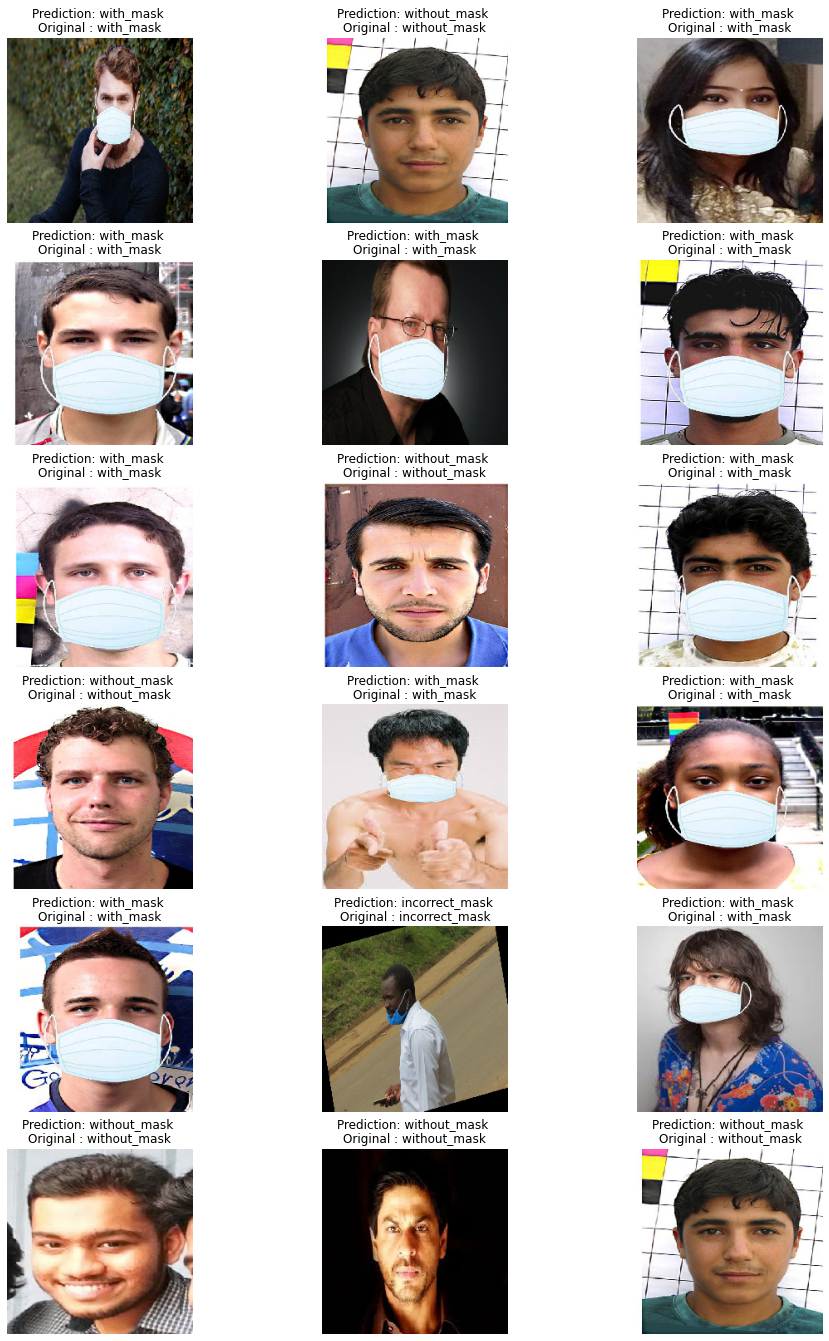

In [23]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(16,16))

for i in range(18):
  image, label = test_data.next()

  model_pred = model.predict(image)

  plt.subplot(6,3,i+1)
  plt.imshow(image[i])
  plt.title(f"Prediction: {labels[tf.argmax(model_pred[i])]} \nOriginal : {labels[tf.argmax(label[i])]}")
  plt.subplots_adjust(top= 1.25)
  plt.axis("off")


In [32]:
from tensorflow.keras.models import load_model
model.save("/content/drive/MyDrive/archive (3)/final")

ModuleNotFoundError: ignored